# Problem Statement

- First task is to create a predictive model which will help the insurance marketing team to know which customer will buy the product.

- Second task is to suggestions to the Insurance market team to make  customers  buy the product.


# Action Plan/Outline

**To address the problem statement effectively, we have outlined a series of crucial steps that will guide us toward the successful achievement of our objective.**

1. Import Libraries
2. Load Dataset
3. Basic Checks
4. Data Pre-processing
5. Predictive Model Creation Using Various Classification Algorithms
6. Evaluating the Predictive Models
7. Conclusion

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# 2. Load Dataset

In [2]:
data = pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_columns',None)

# 3. Basic checks

In [4]:
data.head(10)

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   
5  19       0          5              1          4              0   
6  20       0          2              1          3              1   
7  22       0          5              1          4              0   
8  26       0          5              1          3              1   
9  28       1          1              1          2              0   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0              0              0              1              0              0   
1              0              0              0              1              0   
2              0              0              0              1              0   
3              0              1              0              0              0   
4              0              1              0              0              0   
5              0              0              0              0              1   
6              0              0              1              0              0   
7              0              1              0              0              0   
8              0              0              0              1              0   
9              0              0              1              0              0   

   ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
0              0              0              0              0          0   
1              0              0              0              0          0   
2              0              0              0              0          0   
3              0              0              0              0          0   
4              0              0              0              0          0   
5              0              0              0              0          0   
6              0              0              0              0          0   
7              0              0              0              0          0   
8              0              0              0              0          0   
9              0              0              0              0          0   

   ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
0         11              0              1              0        0.7   
1          3              0              0              1        0.8   
2         12              1              0              0        0.0   
3          8              1              0              0        0.9   
4          9              1              0              0        0.7   
5          6              1              0              0        0.9   
6          8              1              0              0        0.6   
7         13              1              0              0        0.7   
8          6              1              0              0        0.9   
9          4              0              0              1        0.9   

   ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  \
0        0.2   0.718070             10              1             -1   
1        0.4   0.766078             11              1             -1   
2        0.0  -1.000000              7              1             -1   
3        0.2   0.580948              7              1              0   
4        0.6   0.840759             11              1             -1   
5        1.8   2.332649             10              0             -1   
6        0.1   0.617454              6              1             -1   
7        0.4   0.607248             11              1              0   
8        0.7   0.901388             10              1             -1   
9        1.4

In [5]:
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [6]:
data.tail(10)

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
595202  1488001       0          4              1          3              0   
595203  1488005       0          3              2          3              1   
595204  1488008       0          1              2          2              1   
595205  1488009       0          0              3          6              1   
595206  1488011       0          0              1          2              0   
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
595202              0              0              1              0   
595203              0              0              1              0   
595204              0              0              1              0   
595205              0              0              1              0   
595206              0              0              0              0   
595207              0              0              0              0   
595208              0              0              0              0   
595209              0              1              0              0   
595210              0              0              0              1   
595211              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
595202              0              0              0              0   
595203              0              0              0              0   
595204              0              0              0              0   
595205              0              0              0              0   
595206              1              0              0              0   
595207              1              0              0              0   
595208              1              0              0              0   
595209              0              0              0              0   
595210              0              0              0              0   
595211              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
595202              0          0          2              1              0   
595203              0          0          5              0              1   
595204              0          0         11              1              0   
595205              0          0          7              1              0   
595206              0          0          2              1              0   
595207              0          0         13              1              0   
595208              0          0          6              1              0   
595209              0          0         12              1              0   
595210              0          0         12              1              0   
595211              0          0          7              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
595202              0        0.5        0.0   0.366572              9   
595203              0        0.9        1.4   1.939233              7   
595204              0        0.7        0.3   0.704894              6   
595205              0        0.4        0.5   0.904848              5   
595206              0        0.9        0.2   0.653835              7   
595207              0        0.5        0.3   0.692820             10   
595208              0        0.9        0.7   1.382027              9   
595209              0        0.9        0.2   0.659071              7   
595210              0        0.9        0.4   0.698212             11   
595211              0  

In [7]:
data.shape

(595212, 59)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [9]:
# exploring the statistical features of the dataset
data.describe().T.style.background_gradient(cmap = 'coolwarm', low = 0, high = 1)

In [10]:
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

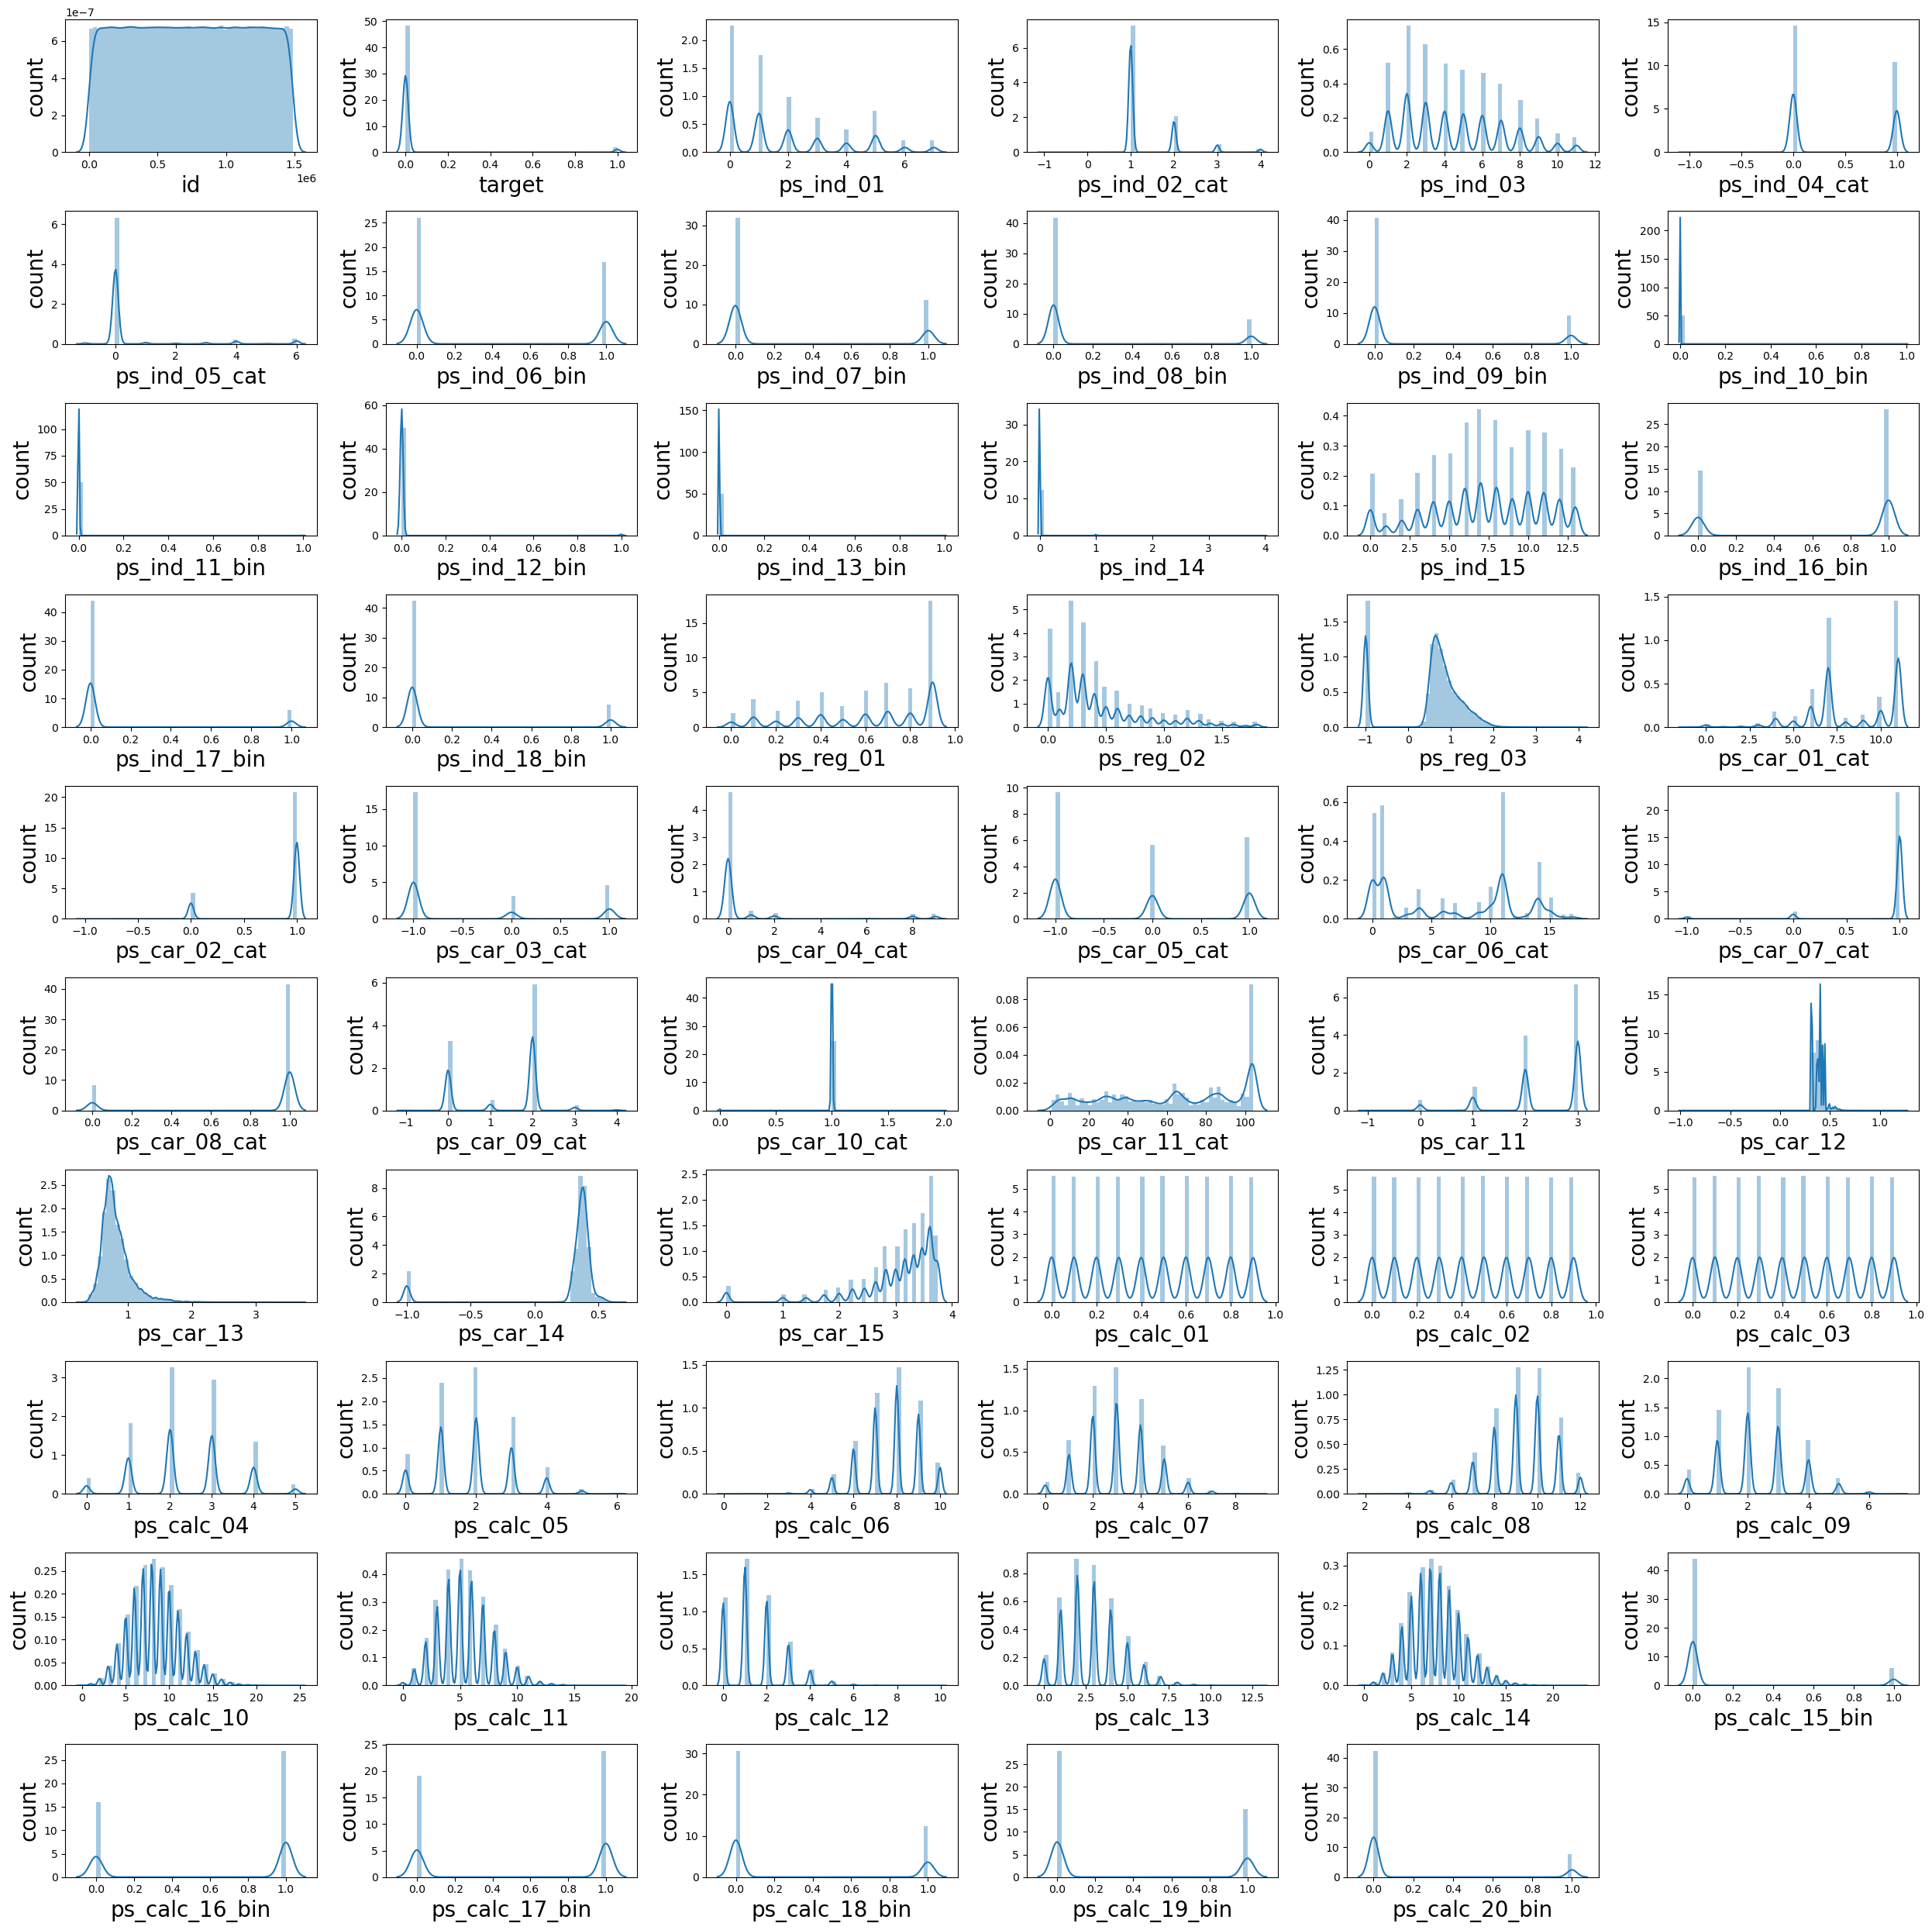

In [11]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumb = 1

for c in data:
    if plotnumb<=60:
        ax = plt.subplot(10,6,plotnumb)
        sns.distplot(data[c])
        plt.xlabel(c,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumb+=1
plt.tight_layout()
plt.show()

# 4. Data Preprocessing

### 4.1 Finding missing values

In [12]:
data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


- **There are no missing values in the data**

# 4.2 Checking for outliers

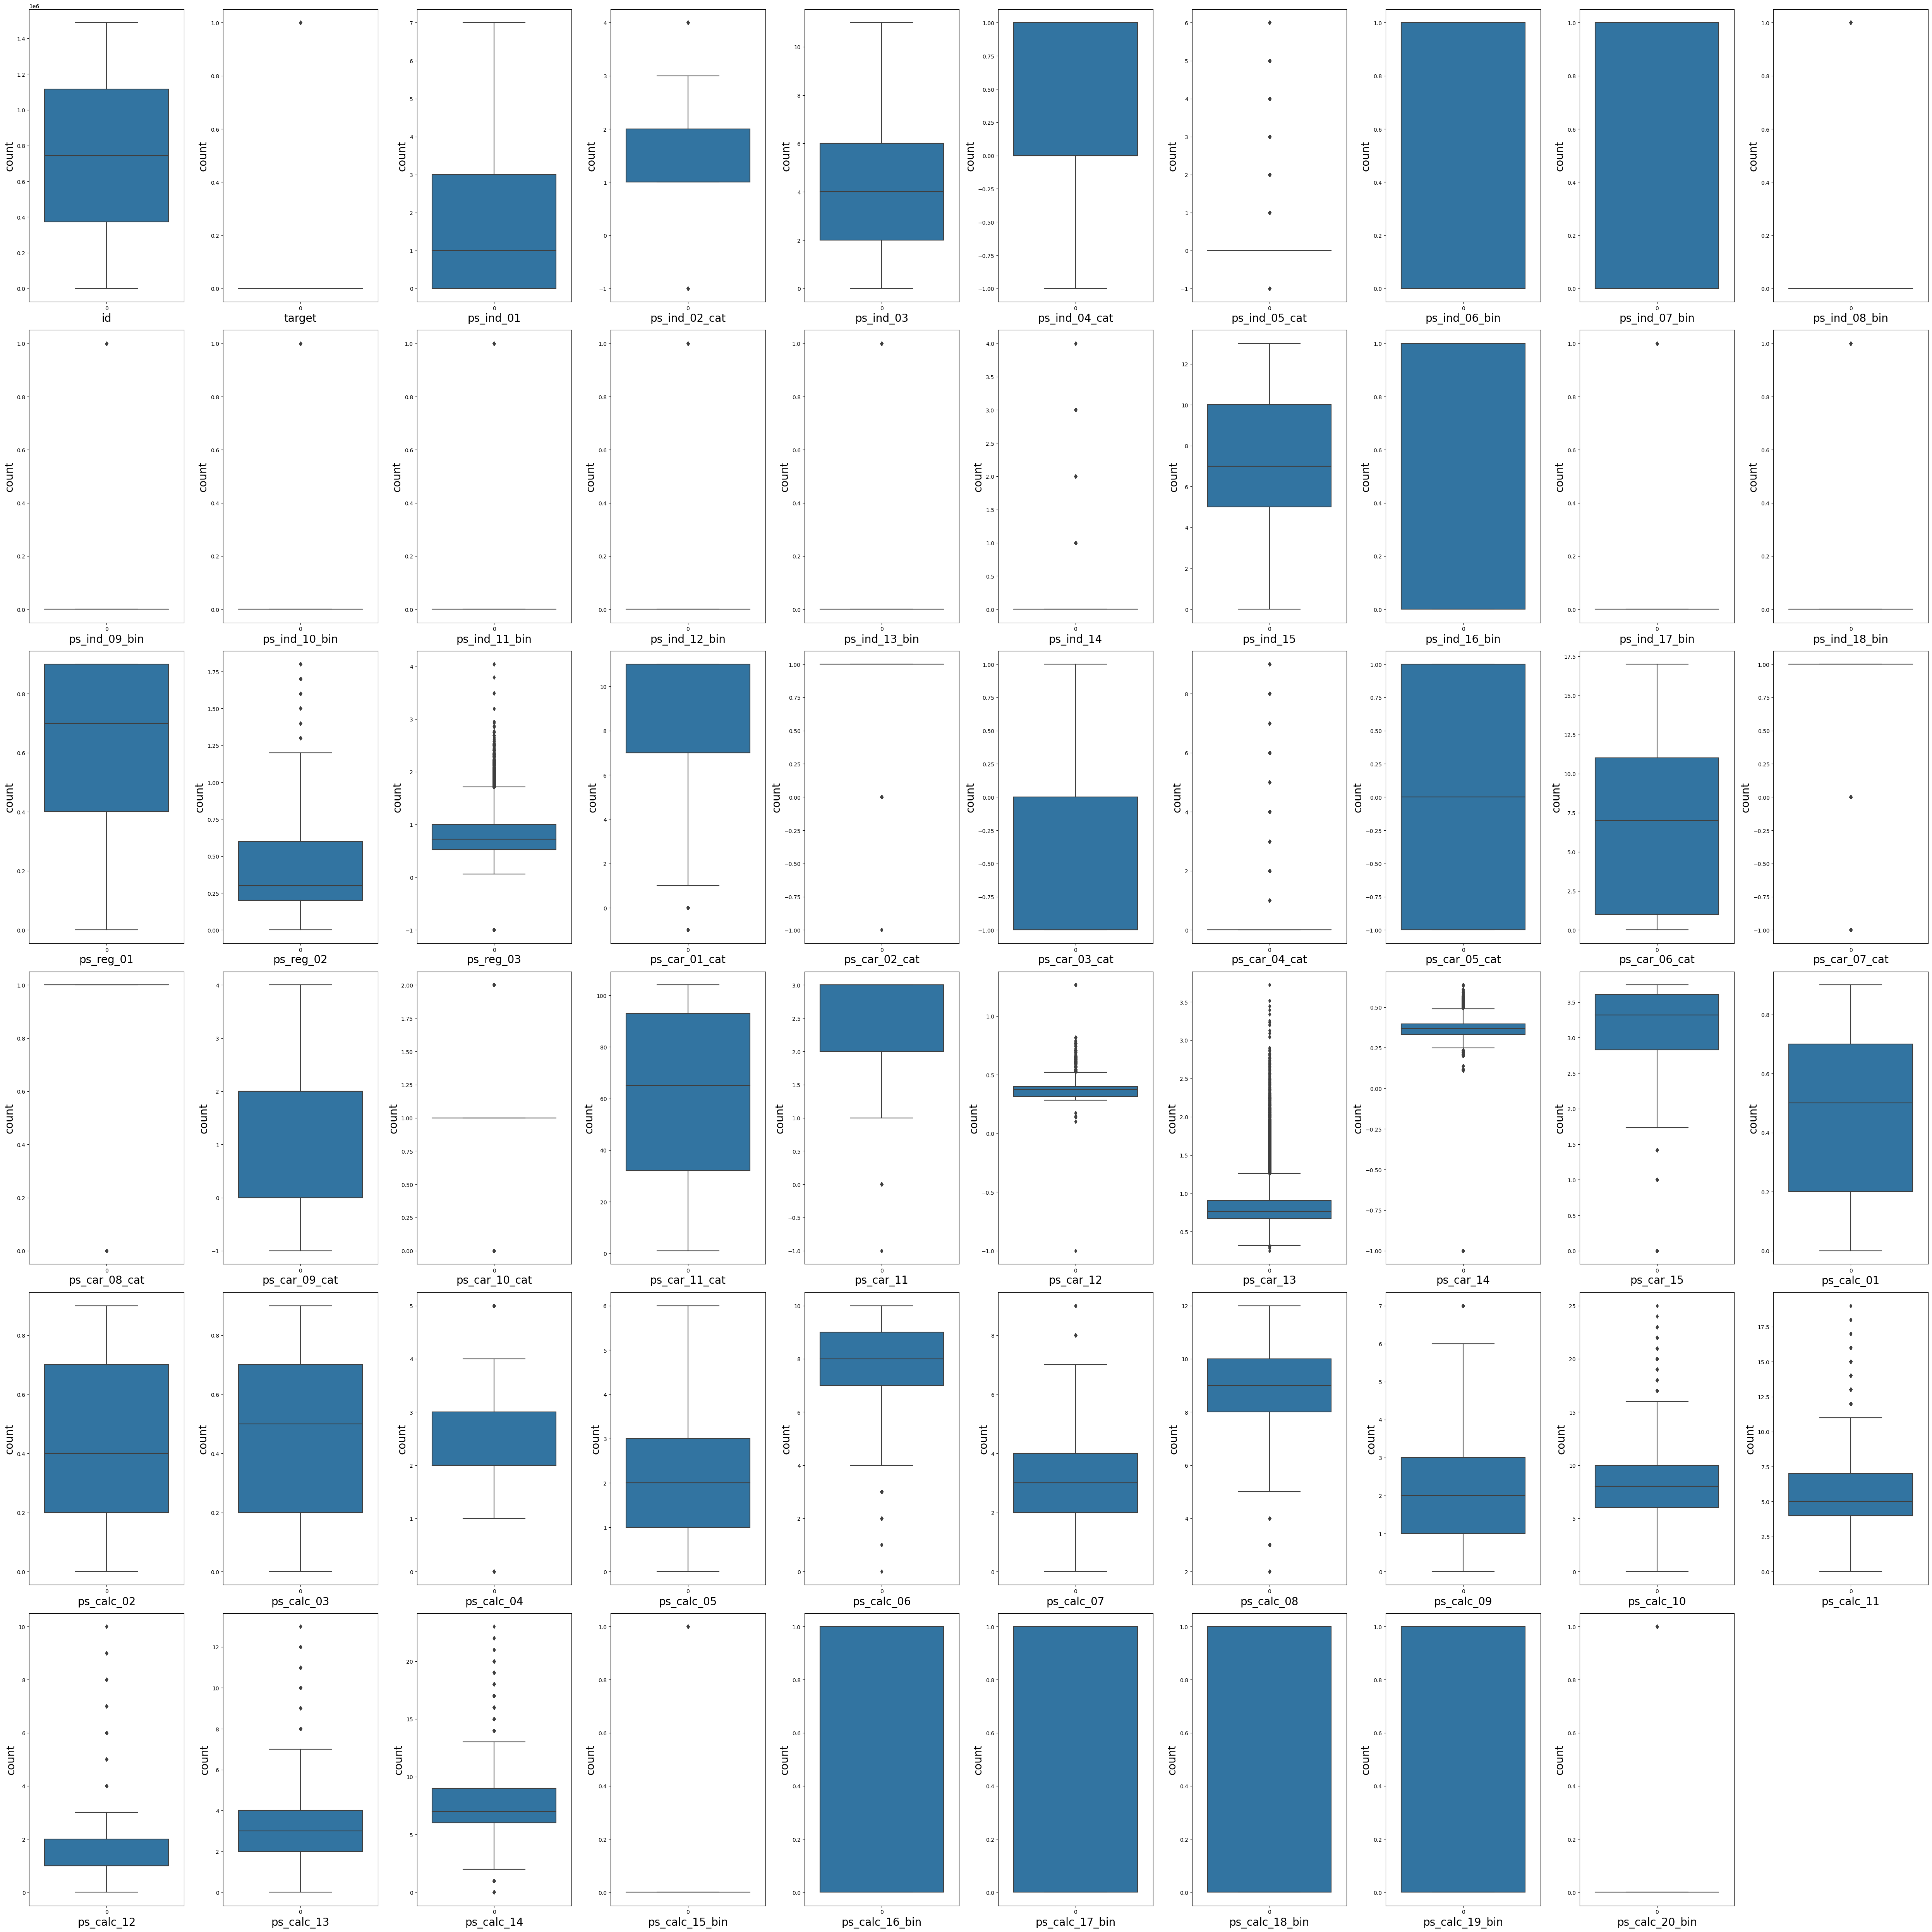

In [13]:
plt.figure(figsize = (50,50), facecolor = 'white')
plotnumber = 1

for column in data: 
    if plotnumber <= 60:
        ax = plt.subplot(6,10,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('count',fontsize = 20)
    plotnumber+=1
plt.tight_layout()
plt.show()

# 4.3 Feature selection

In [5]:
# droping unwanted variables
data.drop('id', axis = 1, inplace = True)

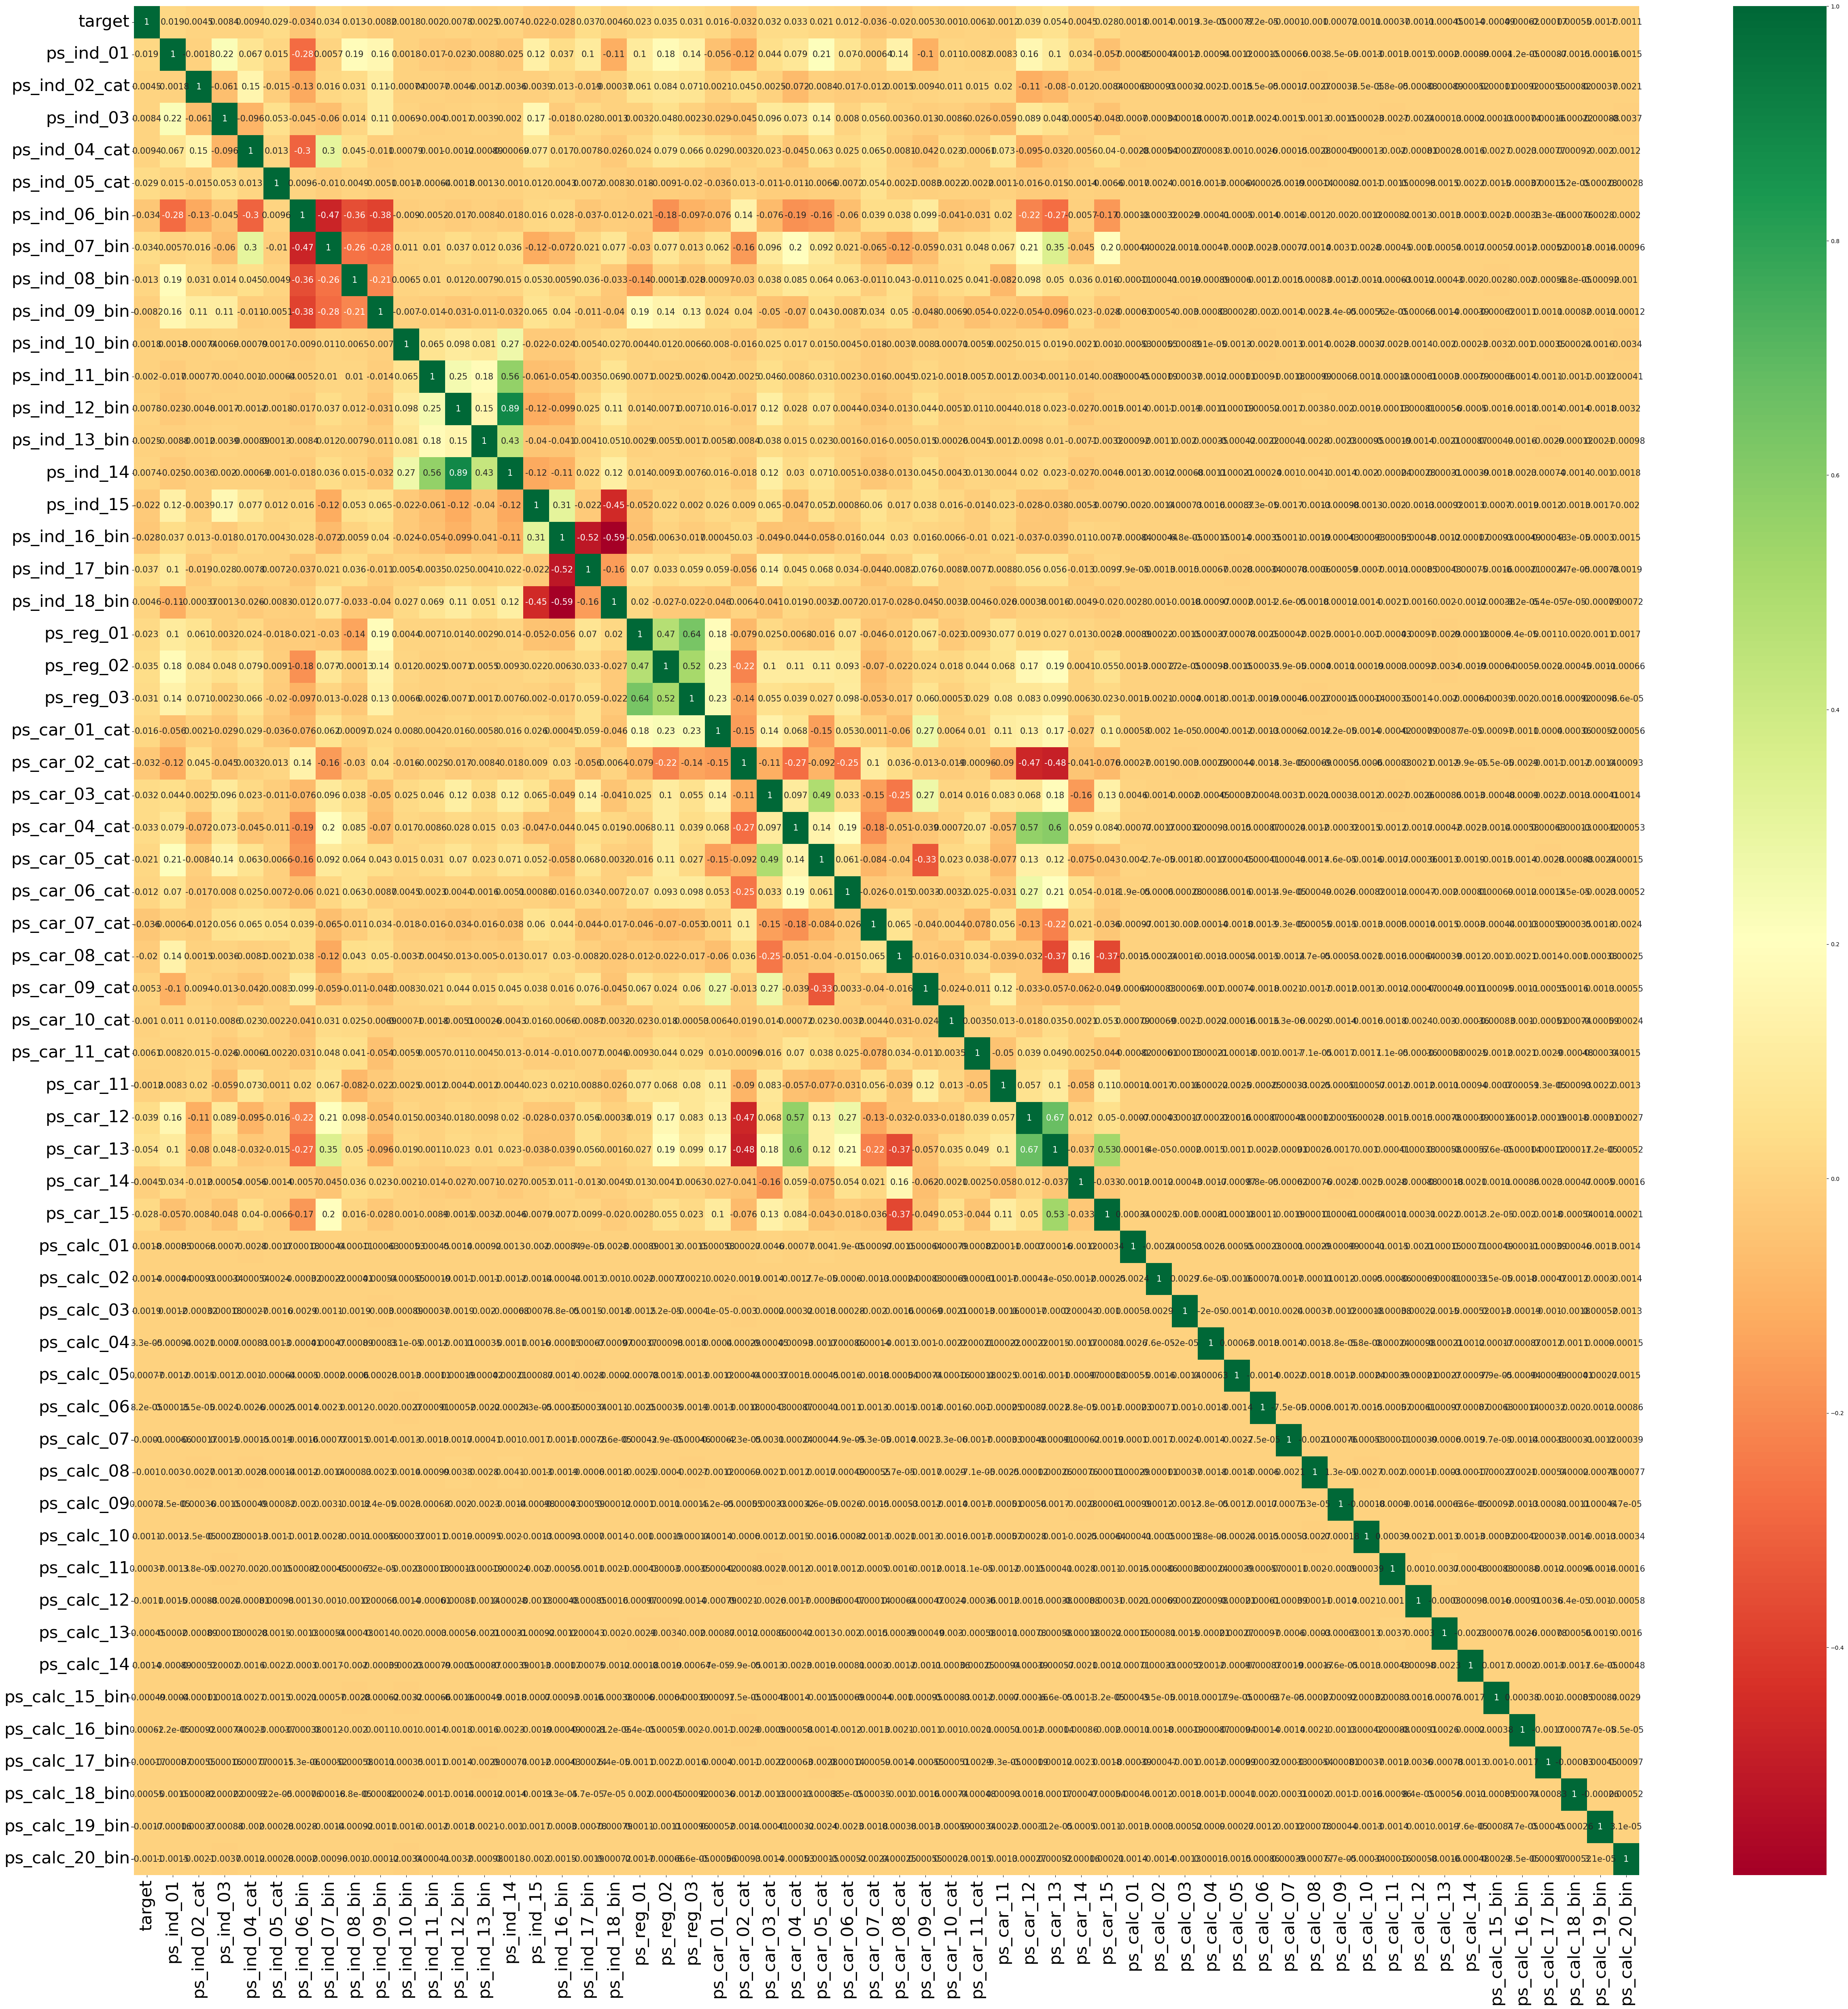

In [15]:
# plotting heatmap to check for correlation between independent variables

plt.figure(figsize=(60,60))
heatmap = sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', annot_kws = {'size': 15})
heatmap.tick_params(axis = 'both', which ='major',labelsize = 30)

In [16]:
## checking how each independent feature correlate with the target variable 

plt.figure(figsize = (60,60))
limit = -1

corr_data = data.corr()['target'].sort_values(ascending =False)
indices = corr_data.index
labels = []
corr = []

for i in range(1, len(indices)):
    if corr_data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(corr_data[i])
        
sns.barplot(x = corr, y = labels)
plt.title('Correlation of features with "target" ', fontsize = 40, fontweight = 'bold')
plt.xlabel('Correlation coefficient', fontsize = 40, fontweight = 'bold')
plt.style.use('fivethirtyeight')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.show()

The significance of the above plot is to visually represent the correlation between each independent feature (or predictor variable) and the target variable in a dataset. The plot's y-axis represents the different features, while the x-axis represents the correlation coefficient values.

The plot helps in the following ways:

1. Identifying important features: It helps identify which features have a strong linear relationship with the target variable. Features with higher correlation coefficients have a stronger linear relationship with the target variable.

2. Feature selection: It aids in the selection of relevant features for building predictive models. Features with high correlation coefficients are usually more influential in predicting the target variable and may be considered more important in the modeling process. Thus the following features have low correlation with the target variable so we can drop these features since the data set is very large and will require high computation power and time:
     
    - ps_calc_04              
    - ps_calc_06        
    - ps_calc_07               
    - ps_calc_09        
    - ps_calc_11              
    - ps_calc_13        
    - ps_calc_15_bin    
    - ps_calc_16_bin    
    - ps_calc_17_bin    
    - ps_calc_18_bin    
       



In [6]:
# Removing low-correlation features to optimize computation time for the large dataset
columns_to_drop = ['ps_calc_04', 'ps_calc_06', 'ps_calc_07', 'ps_calc_09', 'ps_calc_11', 'ps_calc_13', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin']
data1 = data.drop(columns=columns_to_drop)
data1


target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0            0          2              2          5              1   
1            0          1              1          7              0   
2            0          5              4          9              1   
3            0          0              1          2              0   
4            0          0              2          0              1   
...        ...        ...            ...        ...            ...   
595207       0          3              1         10              0   
595208       0          5              1          3              0   
595209       0          1              1         10              0   
595210       0          5              2          3              1   
595211       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                   0              0              1              0   
1                   0              0              0              1   
2                   0              0              0              1   
3                   0              1              0              0   
4                   0              1              0              0   
...               ...            ...            ...            ...   
595207              0              0              0              0   
595208              0              0              0              0   
595209              0              1              0              0   
595210              0              0              0              1   
595211              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
595207              1              0              0              0   
595208              1              0              0              0   
595209              0              0              0              0   
595210              0              0              0              0   
595211              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
0                   0          0         11              0              1   
1                   0          0          3              0              0   
2                   0          0         12              1              0   
3                   0          0          8              1              0   
4                   0          0          9              1              0   
...               ...        ...        ...            ...            ...   
595207              0          0         13              1              0   
595208              0          0          6              1              0   
595209              0          0         12              1              0   
595210              0          0         12              1              0   
595211              0          0          7              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
0                   0        0.7        0.2   0.718070             10   
1                   1        0.8        0.4   0.766078             11   
2                   0        0.0        0.0  -1.000000              7   
3                   0        0.9        0.2   0.580948              7   
4                   0        0.7        0.6   0.840759             11   
...               ...        ...        ...        ...            ...   
595207              0        0.5        0.3   0.6

In [12]:
data1.shape

(595212, 48)

# 5.  Predictive Model Creation Using Various Classification Algorithms

### 5.1 Independent and dependent variable creation

In [7]:
x = data1.drop('target', axis = 1)
y = data1['target']

In [15]:
x

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0               2              2          5              1              0   
1               1              1          7              0              0   
2               5              4          9              1              0   
3               0              1          2              0              0   
4               0              2          0              1              0   
...           ...            ...        ...            ...            ...   
595207          3              1         10              0              0   
595208          5              1          3              0              0   
595209          1              1         10              0              0   
595210          5              2          3              1              0   
595211          0              1          8              0              0   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0                   0              1              0              0   
1                   0              0              1              0   
2                   0              0              1              0   
3                   1              0              0              0   
4                   1              0              0              0   
...               ...            ...            ...            ...   
595207              0              0              0              1   
595208              0              0              0              1   
595209              1              0              0              0   
595210              0              0              1              0   
595211              1              0              0              0   

        ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
0                   0              0              0              0          0   
1                   0              0              0              0          0   
2                   0              0              0              0          0   
3                   0              0              0              0          0   
4                   0              0              0              0          0   
...               ...            ...            ...            ...        ...   
595207              0              0              0              0          0   
595208              0              0              0              0          0   
595209              0              0              0              0          0   
595210              0              0              0              0          0   
595211              0              0              0              0          0   

        ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
0              11              0              1              0        0.7   
1               3              0              0              1        0.8   
2              12              1              0              0        0.0   
3               8              1              0              0        0.9   
4               9              1              0              0        0.7   
...           ...            ...            ...            ...        ...   
595207         13              1              0              0        0.5   
595208          6              1              0              0        0.9   
595209         12              1              0              0        0.9   
595210         12              1              0              0        0.9   
595211          7              1              0              0        0.1   

        ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  \
0             0.2   0.718070             10              1             -1   
1             0.4   0.766078             11              1             -1   
2             0.0  -1.000000              7              1             -1   
3             0.2   0.580948        

In [16]:
y

0         0
1         0
2         0
3         0
4         0
         ..
595207    0
595208    0
595209    0
595210    0
595211    0
Name: target, Length: 595212, dtype: int64

### 5.2 Splitting the dataset into training and validation sets

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [18]:
# shape of train and test data

print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (446409, 47)
x_test (148803, 47)
y_train (446409,)
y_test (148803,)


### 5.3 Balancing the data


Balancing a dataset in machine learning is often done to address the issue of class imbalance. Class imbalance occurs when the classes in the dataset are not represented equally, with one or more classes having significantly fewer samples compared to others. This can lead to biased models that perform poorly on the underrepresented classes. Balancing the dataset can help improve the performance of machine learning algorithms in such scenarios. 

Here are some reasons why balancing a dataset is advisable for certain machine learning algorithms:

1. **Preventing Bias**: Imbalanced datasets can cause the model to be biased towards the majority class, leading to poor generalization and predictive performance for the minority class.

2. **Improved Learning**: Balancing the dataset allows the model to learn from a more representative sample of the data, ensuring that it captures patterns from all classes equally.

3. **Enhanced Performance Metrics**: Balancing the dataset can lead to better performance metrics, such as accuracy, precision, recall, and F1-score, especially for the minority class.

4. **Better Decision Boundaries**: Balancing the dataset can help the algorithm in creating decision boundaries that are more inclusive of all classes, resulting in a more robust and accurate model.

However, it's crucial to note that balancing a dataset is not always necessary or beneficial. In some cases, the class imbalance might reflect the real-world scenario, and artificially balancing the data might lead to overfitting or loss of important information. It's important to carefully assess the nature of the problem, the specific algorithm being used, and the goals of the analysis before deciding whether to balance the dataset.

In [19]:
# check to see if the data is balanced

data['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

- the data is not balanced

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x_train,y_train)

In [21]:
from collections import Counter
print('Actual Classes: ',Counter(y_train))
print('SMOTE Classes: ', Counter(y_smote))

Actual Classes:  Counter({0: 430214, 1: 16195})
SMOTE Classes:  Counter({0: 430214, 1: 430214})


### 5.4 Scaling the data

In [27]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_smote = scaler.fit_transform(x_smote)
#x_test = scaler.fit_transform(x_test)

In [28]:
x_smote

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0               0              1          2              0              0   
1               1              1          5              0              0   
2               2              1          7              0              0   
3               0              2          1              1              0   
4               1              1          6              1              0   
...           ...            ...        ...            ...            ...   
860423          1              3          4              1              0   
860424          5              1          5              1              0   
860425          1              1          1              0              2   
860426          1              1          5              0              0   
860427          0              2          1              1              0   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0                   0              0              1              0   
1                   0              1              0              0   
2                   0              0              0              1   
3                   0              1              0              0   
4                   0              1              0              0   
...               ...            ...            ...            ...   
860423              0              0              0              0   
860424              0              0              0              0   
860425              1              0              0              0   
860426              1              0              0              0   
860427              0              0              0              0   

        ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
0                   0              0              0              0          0   
1                   0              0              0              0          0   
2                   0              0              0              0          0   
3                   0              0              0              0          0   
4                   0              0              0              0          0   
...               ...            ...            ...            ...        ...   
860423              0              0              0              0          0   
860424              0              0              0              0          0   
860425              0              0              0              0          0   
860426              0              0              0              0          0   
860427              0              0              0              0          0   

        ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
0               2              0              0              1   0.600000   
1               8              0              0              1   0.800000   
2              12              1              0              0   0.400000   
3               1              0              0              1   0.900000   
4               4              1              0              0   0.800000   
...           ...            ...            ...            ...        ...   
860423         10              0              0              0   0.784069   
860424          9              0              0              0   0.747511   
860425          5              1              0              0   0.886576   
860426          4              0              0              0   0.634530   
860427          1              0              0              1   0.900000   

        ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  \
0        0.200000   0.702673              7              1             -1   
1        0.300000   0.854766             10              0             -1   
2        0.000000   0.568990              7              1             -1   
3        1.400000   1.322876        

In [29]:
y_smote

0         0
1         0
2         0
3         0
4         0
         ..
860423    1
860424    1
860425    1
860426    1
860427    1
Name: target, Length: 860428, dtype: int64

### 5.4 Importing the various Classification Algorithms

# 1. Logistic Regression Model: 

In [30]:
# Building Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# training the model
lr_model = LogisticRegression()
lr_model.fit(x_smote,y_smote)

# predicting the model
y_predlr = lr_model.predict(x_test)

### 1.1 Evaluating the Logistic Regression Model

- we will 

In [31]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Accuracy score
accuracy = accuracy_score(y_test,y_predlr)
print('Accuracy score for Logistic Regression: ',accuracy)

Accuracy score for Logistic Regression:  0.8662258153397445


In [32]:
# classification report
print('Classification report for Logistic Regression: ', classification_report(y_test,y_predlr))

Classification report for Logistic Regression:                precision    recall  f1-score   support

           0       0.96      0.89      0.93    143304
           1       0.05      0.14      0.07      5499

    accuracy                           0.87    148803
   macro avg       0.51      0.52      0.50    148803
weighted avg       0.93      0.87      0.90    148803



In [33]:
pd.crosstab(y_test,y_predlr)

col_0        0      1
target               
0       128122  15182
1         4724    775

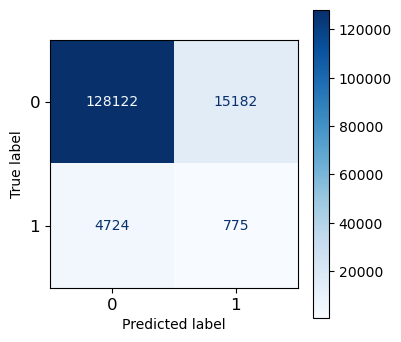

In [34]:
# confusion matrix for the Logistic Regression Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predlr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

# 2. KNeighbors Classifier Model

- **Initially, we'll construct the model using unbalanced data and subsequently build it with balanced data and then proceed to compare the outcomes.**

### 2.1 Creating the KNeighborsClassifier Model with the unbalanced data

In [37]:
# taking optimal k to determine how many nearest neighbors to create

from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    
# This code essentially helps in analyzing the performance of the K-Nearest Neighbors algorithm for different
#values of the n_neighbors hyperparameter by calculating the error rate for each value.
# This can be helpful in determining the optimal value of n_neighbors for the given dataset and problem.
# Calculate the error rate by finding the mean of the elements where the predicted values are not equal to the 
# actual values (from y_test) and append it to the error_rate list

In [38]:
print((np.mean(pred_i != y_test)))

0.036948179808202794


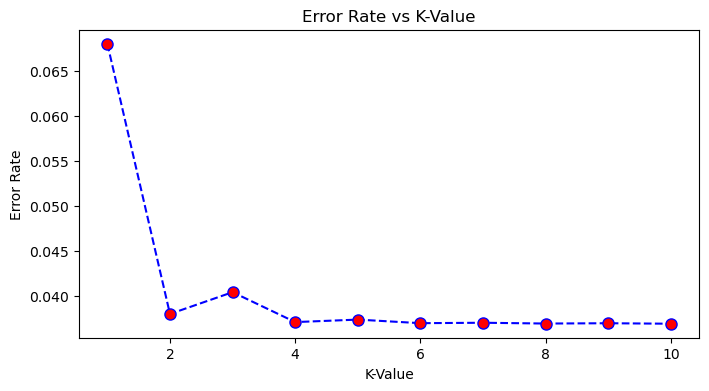

In [39]:
# plot the k-value and error rate

plt.figure(figsize = (8,4))
plt.plot(range(1,11), error_rate, color = 'blue', linestyle = 'dashed',
        marker = 'o', markerfacecolor = 'red', markersize = 8)
plt.title('Error Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

**From the graph the error value is reduced when k is 4 so we take the optimal number of neighbors to be 4.**

In [40]:
# creating the KNeighbors Model with the optimal K Value

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
y_predknn = knn.predict(x_test)

### 2.2 Evaluating the KNeighbors Classifier model with the unbalanced data

In [41]:
# Accuracy score
accuracy = accuracy_score(y_test,y_predknn)
print('Accuracy score for KNeighbors Classifier: ',accuracy)

Accuracy score for KNeighbors Classifier:  0.9628703722371189


In [42]:
# classification report
print('Classification report for KNeighbors Classifier: ', classification_report(y_test,y_predknn))

Classification report for KNeighbors Classifier:                precision    recall  f1-score   support

           0       0.96      1.00      0.98    143304
           1       0.07      0.00      0.00      5499

    accuracy                           0.96    148803
   macro avg       0.51      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



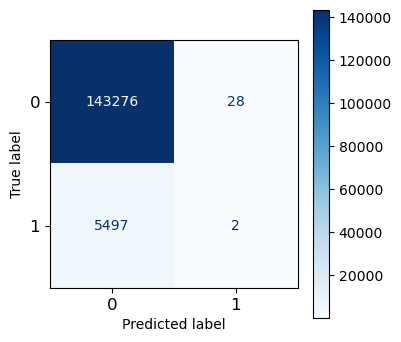

In [43]:
# confusion matrix for the Kneighbors Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predknn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

### 2.3 Creating the KNeighborsClassifier Model with the balanced data

In [23]:
# creating the KNeighbors Model with the optimal K Value
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_smote,y_smote)
y_predknnn = knn.predict(x_test)

### 2.2 Evaluating the KNeighbors Classifier model with the balanced data

In [25]:
# Accuracy score
from sklearn.metrics import accuracy_score, f1_score, classification_report

accuracy = accuracy_score(y_test,y_predknnn)
print('Accuracy score for KNeighbors Classifier: ',accuracy)

Accuracy score for KNeighbors Classifier:  0.791428936244565


In [26]:
# classification report
print('Classification report for KNeighbors Classifier: ', classification_report(y_test,y_predknnn))

Classification report for KNeighbors Classifier:                precision    recall  f1-score   support

           0       0.96      0.81      0.88    143304
           1       0.04      0.21      0.07      5499

    accuracy                           0.79    148803
   macro avg       0.50      0.51      0.48    148803
weighted avg       0.93      0.79      0.85    148803



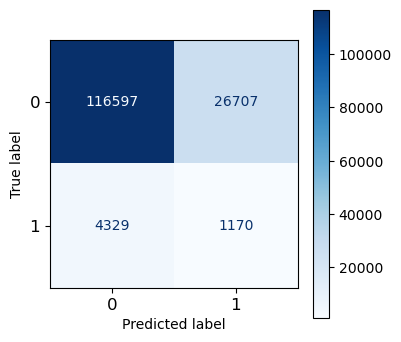

In [27]:
# confusion matrix for the Kneighbors Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predknnn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

# 3. Decision Tree Classifier Model

-  **Initially, we'll construct the model using unbalanced data and subsequently build it with balanced data and then proceed to compare the outcomes.**

### 3.1 Creating the DecisionTreeClassifier Model with the unbalanced data

In [28]:
# Building Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10, min_samples_leaf = 1, min_samples_split = 3, splitter = 'random')
dt.fit(x_train,y_train)
y_preddt = dt.predict(x_test)

### 3.2 Evaluating the Decision Tree Classifier modelfor the unbalanced data

In [30]:
# Accuracy score
accuracy = accuracy_score(y_test,y_preddt)
print('Accuracy score for Decision Tree Classifier: ',accuracy)

Accuracy score for Decision Tree Classifier:  0.9626351619254988


In [31]:
# classification report
print('Classification report for Decision Tree Classifier: ', classification_report(y_test,y_preddt))

Classification report for Decision Tree Classifier:                precision    recall  f1-score   support

           0       0.96      1.00      0.98    143304
           1       0.11      0.00      0.00      5499

    accuracy                           0.96    148803
   macro avg       0.54      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



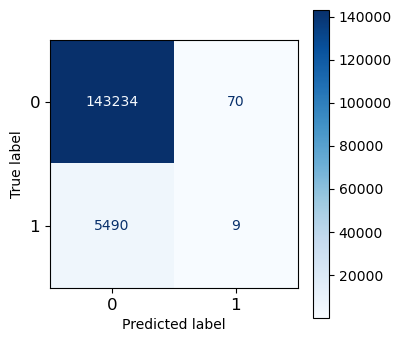

In [32]:
# confusion matrix for the Decision Tree Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_preddt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

### 3.3 Creating the DecisionTreeClassifier Model using the balanced data

In [34]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10, min_samples_leaf = 1, min_samples_split = 3, splitter = 'random')
dt.fit(x_smote,y_smote)
y_preddts = dt.predict(x_test)

### 3.4 Evaluating the Decision Tree Classifier modelfor the balanced data

In [35]:
# Accuracy score
accuracy = accuracy_score(y_test,y_preddts)
print('Accuracy score for Decision Tree Classifier: ',accuracy)

Accuracy score for Decision Tree Classifier:  0.888792564666035


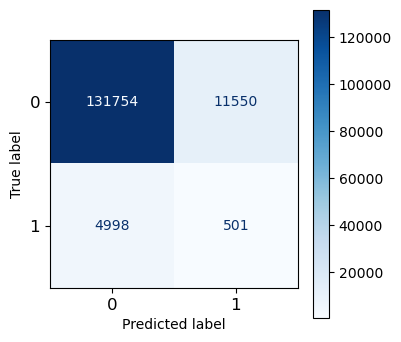

In [36]:
# confusion matrix for the Decision Tree Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_preddts)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

# 4. Gradient Boosting Classifier Model

### 4.1 Building the GradientBoostingClassifier Model using unbalanced data

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_predgb = gb.predict(x_test)

### 4.2 Evaluating the Gradient Boosting Classifier model for the unbalanced data

In [13]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test,y_predgb)
print('Accuracy score for Gradient Boosting Classifier: ',accuracy)

Accuracy score for Gradient Boosting Classifier:  0.9630450998971795


In [46]:
print('Classification report for Gradient Boosting: ', classification_report(y_test,y_predgb))

Classification report for Gradient Boosting:                precision    recall  f1-score   support

           0       0.96      1.00      0.98    143304
           1       0.50      0.00      0.00      5499

    accuracy                           0.96    148803
   macro avg       0.73      0.50      0.49    148803
weighted avg       0.95      0.96      0.94    148803



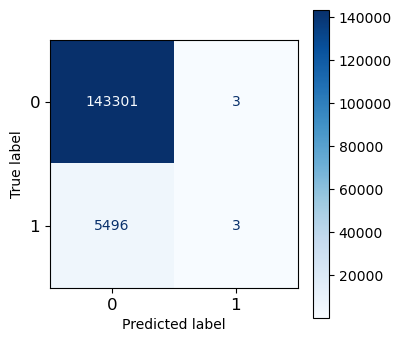

In [47]:
# confusion matrix for the Gradient Boosting Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

### 4.3 Building the GradientBoostingClassifier Model using balanced data

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_smote,y_smote)
y_predgbs = gb.predict(x_test)

### 4.4 Evaluating the Gradient Boosting Classifier model for the balanced data

In [11]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test,y_predgbs)
print('Accuracy score for Gradient Boosting Classifier: ',accuracy)

Accuracy score for Gradient Boosting Classifier:  0.9536501280216124


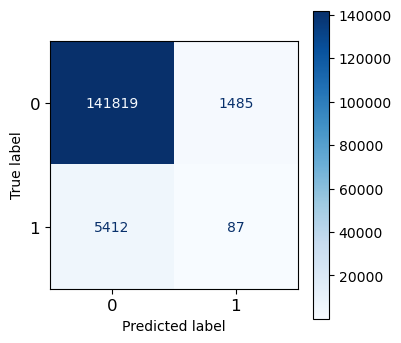

In [14]:
# confusion matrix for the Gradient Boosting Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predgbs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

# 5. Random Forest Classifier Model

-  **Initially, we'll construct the model using unbalanced data and subsequently build it with balanced data and then proceed to compare the outcomes.**

### 5.1 Building the Random Forest Model with the unbalanced data

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_predrf = rf.predict(x_test)

### 5.2 Evaluating the Random Forest Classifier model for the unbalanced data

In [16]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test,y_predrf)
print('Accuracy score for Random Forest Classifier: ',accuracy)

Accuracy score for Gradient Boosting Classifier:  0.9630316593079441


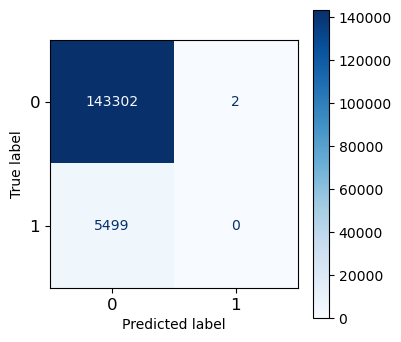

In [17]:
# confusion matrix for the Random Forest Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predrf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

### 5.3 Building the Random Forest Model with the balanced data

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_smote,y_smote)

y_predrfs = rf.predict(x_test)

### 5.4 Evaluating the Random Forest Classifier model for the balanced data

In [19]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test,y_predrfs)
print('Accuracy score for Random Forest Classifier: ',accuracy)

Accuracy score for Gradient Boosting Classifier:  0.9606929967809789


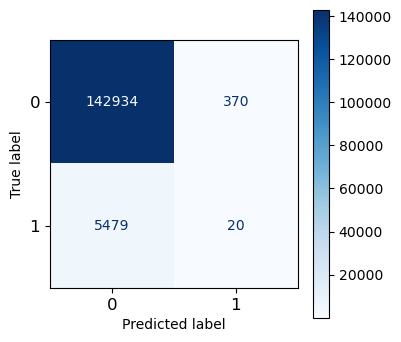

In [20]:
# confusion matrix for the Random Forest Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predrfs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

# 6. Naive Bayes Classification Model

-  **Initially, we'll construct the model using unbalanced data and subsequently build it with balanced data and then proceed to compare the outcomes.**

### 6.1 Building the Naive Bayes Model with the unbalanced data

In [21]:
from sklearn.naive_bayes import GaussianNB
g_model = GaussianNB()

g_model.fit(x_train,y_train)

y_predg = g_model.predict(x_test)

### 6.2 Evaluating the Naive Bayes Classifier model for the unbalanced data

In [22]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test,y_predg)
print('Accuracy score for Naive Bayes Classifier: ',accuracy)

Accuracy score for Gradient Boosting Classifier:  0.9039468290289846


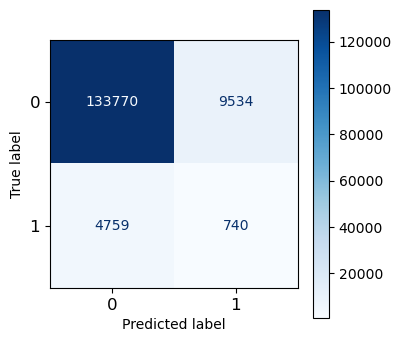

In [23]:
# confusion matrix for the Gaussian Naive Bayes Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

### 6.3 Building the Naive Bayes Model with the balanced data

In [24]:
from sklearn.naive_bayes import GaussianNB
gs_model = GaussianNB()

gs_model.fit(x_smote,y_smote)

y_predgs = gs_model.predict(x_test)

### 6.4 Evaluating the Random Forest Classifier model for the balanced data

In [25]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test,y_predgs)
print('Accuracy score for Gaussian NB Classifier: ',accuracy)

Accuracy score for Gradient Boosting Classifier:  0.37623569417283254


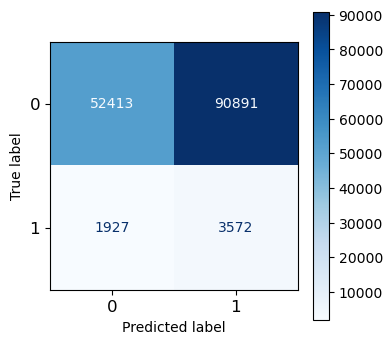

In [26]:
# confusion matrix for the Gaussian Naive Bayes Classifier Model


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_predgs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])

fig, ax = plt.subplots(figsize=(4,4))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set the font size of the labels for better visibility
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()

# 7. Support Vector Machine Model

In [27]:
from sklearn.svm import SVC
sv = SVC()

sv.fit(x_smote,y_smote)

y_predsv = sv.predict(x_test)

### 7.1 Evaluating the Support Vector Classifier model 

In [28]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test,y_predsv)
print('Accuracy score for Support Vector Classifier: ',accuracy)

Accuracy score for Gradient Boosting Classifier:  0.9070314442585163


In [29]:
pd.crosstab(y_test,y_predsv)

col_0        0     1
target              
0       134635  8669
1         5165   334

# Principal Component Analysis

- All the classification models build above are not able to classify the minority class even after balancing the dataset, this challenges and issues are as a result of high-dimensional data (dataset with large features). This leads to sparsity as majority of the data points or features have zero or near-zero values. Sparsity can be related to class imbalance in classification problems. Since one class is rare, and the data for that class is sparse, it might be challenging for a model to learn patterns associated with that class hence the models inability to properly classify or predict the minority class. 
- As a result we will employ Principal Component Analysis (PCA) which is a dimensionality reduction technique commonly used in machine learning and statistics. It allows you to transform high-dimensional data into a lower-dimensional form, capturing the most important information in the original data.

In [30]:
data.head()

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0       0          2              2          5              1              0   
1       0          1              1          7              0              0   
2       0          5              4          9              1              0   
3       0          0              1          2              0              0   
4       0          0              2          0              1              0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_10_bin  \
0              0              1              0              0              0   
1              0              0              1              0              0   
2              0              0              1              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

   ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  ps_ind_15  \
0              0              0              0          0         11   
1              0              0              0          0          3   
2              0              0              0          0         12   
3              0              0              0          0          8   
4              0              0              0          0          9   

   ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  ps_reg_02  \
0              0              1              0        0.7        0.2   
1              0              0              1        0.8        0.4   
2              1              0              0        0.0        0.0   
3              1              0              0        0.9        0.2   
4              1              0              0        0.7        0.6   

   ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  ps_car_04_cat  \
0   0.718070             10              1             -1              0   
1   0.766078             11              1             -1              0   
2  -1.000000              7              1             -1              0   
3   0.580948              7              1              0              0   
4   0.840759             11              1             -1              0   

   ps_car_05_cat  ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  ps_car_09_cat  \
0              1              4              1              0              0   
1             -1             11              1              1              2   
2             -1             14              1              1              2   
3              1             11              1              1              3   
4             -1             14              1              1              2   

   ps_car_10_cat  ps_car_11_cat  ps_car_11  ps_car_12  ps_car_13  ps_car_14  \
0              1             12          2   0.400000   0.883679   0.370810   
1              1             19          3   0.316228   0.618817   0.388716   
2              1             60          1   0.316228   0.641586   0.347275   
3              1            104          1   0.374166   0.542949   0.294958   
4              1             82          3   0.316070   0.565832   0.365103   

   ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  ps_calc_05  \
0   3.605551         0.6         0.5         0.2           3           1   
1   2.449490         0.3         0.1         0.3           2           1   
2   3.316625         0.5         0.7         0.1           2           2   
3   2.000000         0.6         0.9         0.1           2           4   
4   2.000000         0.4         0.6         0.0           2           2   

   ps_calc_06  ps_calc_07  ps_calc_08  ps_calc_09  ps_calc_10  ps_calc_11  \
0          10           1          10           1           5           9   
1           9           5           8           1           7           3   
2           9           1           8           2           7           4 

In [32]:
# creating independent and dependent variables

x1 = data.drop('target', axis = 1)

In [33]:
x1

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0               2              2          5              1              0   
1               1              1          7              0              0   
2               5              4          9              1              0   
3               0              1          2              0              0   
4               0              2          0              1              0   
...           ...            ...        ...            ...            ...   
595207          3              1         10              0              0   
595208          5              1          3              0              0   
595209          1              1         10              0              0   
595210          5              2          3              1              0   
595211          0              1          8              0              0   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0                   0              1              0              0   
1                   0              0              1              0   
2                   0              0              1              0   
3                   1              0              0              0   
4                   1              0              0              0   
...               ...            ...            ...            ...   
595207              0              0              0              1   
595208              0              0              0              1   
595209              1              0              0              0   
595210              0              0              1              0   
595211              1              0              0              0   

        ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
0                   0              0              0              0          0   
1                   0              0              0              0          0   
2                   0              0              0              0          0   
3                   0              0              0              0          0   
4                   0              0              0              0          0   
...               ...            ...            ...            ...        ...   
595207              0              0              0              0          0   
595208              0              0              0              0          0   
595209              0              0              0              0          0   
595210              0              0              0              0          0   
595211              0              0              0              0          0   

        ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
0              11              0              1              0        0.7   
1               3              0              0              1        0.8   
2              12              1              0              0        0.0   
3               8              1              0              0        0.9   
4               9              1              0              0        0.7   
...           ...            ...            ...            ...        ...   
595207         13              1              0              0        0.5   
595208          6              1              0              0        0.9   
595209         12              1              0              0        0.9   
595210         12              1              0              0        0.9   
595211          7              1              0              0        0.1   

        ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  \
0             0.2   0.718070             10              1             -1   
1             0.4   0.766078             11              1             -1   
2             0.0  -1.000000              7              1             -1   
3             0.2   0.580948        

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x1)

In [35]:
scaled_data

array([[ 0.0502179 ,  0.9645855 ,  0.21359383, ..., -0.63472992,
        -0.73222528,  2.34997253],
       [-0.45386836, -0.54009356,  0.95436209, ..., -0.63472992,
         1.36569991, -0.42553689],
       [ 1.56247669,  3.9739436 ,  1.69513035, ..., -0.63472992,
         1.36569991, -0.42553689],
       ...,
       [-0.45386836, -0.54009356,  2.06551448, ..., -0.63472992,
        -0.73222528, -0.42553689],
       [ 1.56247669,  0.9645855 , -0.52717443, ...,  1.57547323,
        -0.73222528, -0.42553689],
       [-0.95795462, -0.54009356,  1.32474622, ..., -0.63472992,
        -0.73222528, -0.42553689]])

In [36]:
# scaler gives the values in arrays so we have to convert it to datafram

df = pd.DataFrame(data = scaled_data, columns = x1.columns)

In [37]:
df

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0        0.050218       0.964585   0.213594       1.182227      -0.299997   
1       -0.453868      -0.540094   0.954362      -0.844892      -0.299997   
2        1.562477       3.973944   1.695130       1.182227      -0.299997   
3       -0.957955      -0.540094  -0.897559      -0.844892      -0.299997   
4       -0.957955       0.964585  -1.638327       1.182227      -0.299997   
...           ...            ...        ...            ...            ...   
595207   0.554304      -0.540094   2.065514      -0.844892      -0.299997   
595208   1.562477      -0.540094  -0.527174      -0.844892      -0.299997   
595209  -0.453868      -0.540094   2.065514      -0.844892      -0.299997   
595210   1.562477       0.964585  -0.527174       1.182227      -0.299997   
595211  -0.957955      -0.540094   1.324746      -0.844892      -0.299997   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0           -0.805893       1.700163      -0.442786      -0.476919   
1           -0.805893      -0.588179       2.258425      -0.476919   
2           -0.805893      -0.588179       2.258425      -0.476919   
3            1.240860      -0.588179      -0.442786      -0.476919   
4            1.240860      -0.588179      -0.442786      -0.476919   
...               ...            ...            ...            ...   
595207      -0.805893      -0.588179      -0.442786       2.096794   
595208      -0.805893      -0.588179      -0.442786       2.096794   
595209       1.240860      -0.588179      -0.442786      -0.476919   
595210      -0.805893      -0.588179       2.258425      -0.476919   
595211       1.240860      -0.588179      -0.442786      -0.476919   

        ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
0           -0.019316      -0.041167      -0.097615      -0.030797  -0.097621   
1           -0.019316      -0.041167      -0.097615      -0.030797  -0.097621   
2           -0.019316      -0.041167      -0.097615      -0.030797  -0.097621   
3           -0.019316      -0.041167      -0.097615      -0.030797  -0.097621   
4           -0.019316      -0.041167      -0.097615      -0.030797  -0.097621   
...               ...            ...            ...            ...        ...   
595207      -0.019316      -0.041167      -0.097615      -0.030797  -0.097621   
595208      -0.019316      -0.041167      -0.097615      -0.030797  -0.097621   
595209      -0.019316      -0.041167      -0.097615      -0.030797  -0.097621   
595210      -0.019316      -0.041167      -0.097615      -0.030797  -0.097621   
595211      -0.019316      -0.041167      -0.097615      -0.030797  -0.097621   

        ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
0        1.043440      -1.395821       2.694238      -0.425746   0.309442   
1       -1.212598      -1.395821      -0.371162       2.348817   0.657096   
2        1.325445       0.716424      -0.371162      -0.425746  -2.124135   
3        0.197425       0.716424      -0.371162      -0.425746   1.004750   
4        0.479430       0.716424      -0.371162      -0.425746   0.309442   
...           ...            ...            ...            ...        ...   
595207   1.607449       0.716424      -0.371162      -0.425746  -0.385866   
595208  -0.366584       0.716424      -0.371162      -0.425746   1.004750   
595209   1.325445       0.716424      -0.371162      -0.425746   1.004750   
595210   1.325445       0.716424      -0.371162      -0.425746   1.004750   
595211  -0.084579       0.716424      -0.371162      -0.425746  -1.776482   

        ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  \
0       -0.591654   0.210419       0.679380       0.452653      -0.627780   
1       -0.096928   0.270919       1.078061       0.452653      -0.627780   
2       -1.086380  -1.954747      -0.516665       0.452653      -0.627780   
3       -0.591654   0.037612      -0

### Getting the optimal number of PCA

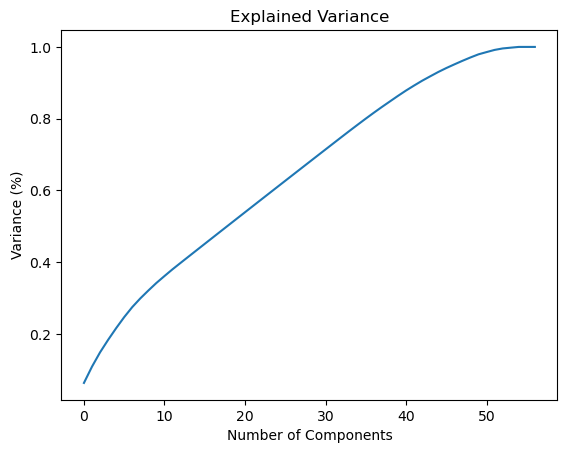

In [39]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

- The above code creates a plot to visualize the cumulative explained variance as a function of the number of principal components. The x-axis represents the number of components, while the y-axis shows the cumulative percentage of variance explained. This plot is crucial for deciding how many principal components to retain for further analysis. The "elbow" point in the plot, where the explained variance begins to level off, often indicates the optimal number of components to keep. 
- From the diagram above, it can be seen that 50 principal components explain almost 90% of the variance in data. so instead of getting all the columns as input, we'd only feed these 50 principal components of the data to the machine learning algorithm and we'd obtain a similar result. how ever we believe that this will not improve the computation time and reduce the curse of dimensionality


# Conclusion

The goal of the study was to develop a predictive model which will help the insurance marketing team to know which customer will buy the product.
Preprocessing, model creation, training, testing, and performance evaluation were among the processes that made up its framework.

1. **Data Inspection:**
   - We began by conducting an initial review of the data, revealing that our dataset contained 59 columns and 595212 features.
2. **Data Quality Assessment:**
   - We meticulously assessed the dataset for missing values to ensure data integrity and completeness.
 

4. **Model Building and Accuracy Assessment:**
   - We employed a diverse set of classification models, including Logistic Regression, Random Forest, Decision Tree, K-Nearest Neighbors (KNN), Gaussian Naive Bayes, Bernoulli Naive Bayes, Gradient Boosting, and support vector machine to classify to develop the predictive model. Each model was evaluated for accuracy.
  
    - Accuracy score was used to evaluate the models, and all the models gave a good accuracy score of more than 70%, however all the classification models built were not able to classify the minority class even after balancing the dataset, this challenges and issues are as a result of high-dimensional data (dataset with large features). This leads to sparsity as majority of the data points or features have zero or near-zero values. Sparsity can be related to class imbalance in classification problems. Since one class is rare, and the data for that class is sparse, it might be challenging for a model to learn patterns associated with that class hence the models inability to properly classify or predict the minority class. 
    
    - We next tried to use SMOTE to oversample the minority class in an effort to balance the dataset, however this adjustment did improve tha accuracy score but a little improvement in the correct classification of the minority class was realised.  
    - 
5. **Principal Component Analysis (PCA):**
   - We explored Principal Component Analysis (PCA) as a dimensionality reduction technique, aiming to reduce feature dimensions and assessed the impact of PCA on model performance. Our analysis revealed no enhancement in the model's performance, leading to the decision to exclude principal components from this report.
   
